In [383]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('ticks')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('dataset.csv', index_col=0)
df_test = pd.read_csv('validation_set.csv', index_col=0)

In [3]:
df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,200000,2,3,1,30,2,2,2,2,2,...,147273,149244,151973,6600,6000,5860,6000,5000,0,0
1,200000,2,4,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2,20000,2,2,2,28,0,0,2,0,0,...,8168,6894,11424,3353,3,5101,6,6530,8103,1
3,50000,1,2,2,23,0,0,0,-1,0,...,48437,18712,19129,4175,41000,51705,700,718,700,0
4,20000,1,2,1,47,-1,-1,-1,-2,-2,...,0,0,0,780,0,0,0,0,0,0


In [4]:
df_train = df_train.astype(float)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22499
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   22500 non-null  float64
 1   SEX                         22500 non-null  float64
 2   EDUCATION                   22500 non-null  float64
 3   MARRIAGE                    22500 non-null  float64
 4   AGE                         22500 non-null  float64
 5   PAY_0                       22500 non-null  float64
 6   PAY_2                       22500 non-null  float64
 7   PAY_3                       22500 non-null  float64
 8   PAY_4                       22500 non-null  float64
 9   PAY_5                       22500 non-null  float64
 10  PAY_6                       22500 non-null  float64
 11  BILL_AMT1                   22500 non-null  float64
 12  BILL_AMT2                   22500 non-null  float64
 13  BILL_AMT3                   225

In [6]:
df_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,...,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,167267.274667,1.602533,1.852356,1.549911,35.526000,-0.014978,-0.135200,-0.166800,-0.221333,-0.266533,...,43265.662667,40400.279733,38997.275778,5697.756489,5.944526e+03,5308.332489,4802.920444,4724.458178,5165.231067,0.221200
std,129383.700485,0.489385,0.787066,0.521673,9.231461,1.119429,1.189176,1.194886,1.166326,1.131526,...,64360.019334,60879.044012,59646.978910,17201.619690,2.214392e+04,18549.384158,15738.417203,14938.300190,17467.663795,0.415064
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-61372.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2280.000000,1760.000000,1243.750000,1000.000000,8.270000e+02,390.000000,300.000000,258.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19003.500000,18105.500000,17071.000000,2100.000000,2.006000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54562.500000,50343.750000,49355.500000,5009.000000,5.000000e+03,4510.500000,4001.500000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


In [7]:
df_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
print(df_train.SEX.value_counts())
df_train.SEX = np.where(df_train.SEX == 2, 0, df_train.SEX)
print(df_train.SEX.value_counts())

2.0    13557
1.0     8943
Name: SEX, dtype: int64
0.0    13557
1.0     8943
Name: SEX, dtype: int64


In [9]:
conditions = [df_train.MARRIAGE == 3, df_train.MARRIAGE == 2]
choices = [0, 0]

print(df_train.MARRIAGE.value_counts())
df_train.MARRIAGE = np.select(conditions, choices, df_train.MARRIAGE)
print(df_train.MARRIAGE.value_counts())

2.0    11942
1.0    10281
3.0      236
0.0       41
Name: MARRIAGE, dtype: int64
0.0    12219
1.0    10281
Name: MARRIAGE, dtype: int64


In [10]:
conditions = [df_train.EDUCATION == 5, df_train.EDUCATION == 6, df_train.EDUCATION == 0]
choices = [4, 4, 4]

print(df_train.EDUCATION.value_counts())
df_train.EDUCATION = np.select(conditions, choices, df_train.EDUCATION)
print(df_train.EDUCATION.value_counts())

2.0    10546
1.0     7921
3.0     3690
5.0      205
4.0       90
6.0       35
0.0       13
Name: EDUCATION, dtype: int64
2.0    10546
1.0     7921
3.0     3690
4.0      343
Name: EDUCATION, dtype: int64


In [11]:
df_train.rename(columns={'default payment next month': 'default', 'PAY_0': 'PAY_1'}, inplace=True)

In [12]:
col_dict = {col: col.lower() for col in df_train.columns}
df_train.rename(columns=col_dict, inplace = True)
df_train.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [13]:
to_dummy = ['education', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df_train = pd.get_dummies(df_train, columns=to_dummy, prefix=to_dummy, drop_first=True, dtype=float)

In [14]:
df_train.columns = [col.replace('.0', '').replace('-', 'minus_') for col in df_train.columns]
df_train.columns

Index(['limit_bal', 'sex', 'marriage', 'age', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default',
       'education_2', 'education_3', 'education_4', 'pay_1_minus_1', 'pay_1_0',
       'pay_1_1', 'pay_1_2', 'pay_1_3', 'pay_1_4', 'pay_1_5', 'pay_1_6',
       'pay_1_7', 'pay_1_8', 'pay_2_minus_1', 'pay_2_0', 'pay_2_1', 'pay_2_2',
       'pay_2_3', 'pay_2_4', 'pay_2_5', 'pay_2_6', 'pay_2_7', 'pay_3_minus_1',
       'pay_3_0', 'pay_3_1', 'pay_3_2', 'pay_3_3', 'pay_3_4', 'pay_3_5',
       'pay_3_6', 'pay_3_7', 'pay_3_8', 'pay_4_minus_1', 'pay_4_0', 'pay_4_1',
       'pay_4_2', 'pay_4_3', 'pay_4_4', 'pay_4_5', 'pay_4_6', 'pay_4_7',
       'pay_4_8', 'pay_5_minus_1', 'pay_5_0', 'pay_5_2', 'pay_5_3', 'pay_5_4',
       'pay_5_5', 'pay_5_6', 'pay_5_7', 'pay_5_8', 'pay_6_minus_1', 'pay_6_0',
       'pay_6_2', 'pay_6_3', 'pay_6_4', 'pay_6_5', 'pay_6_6', 'pay_6_7',
       'pay_

In [15]:
# df_train = pd.concat([df_train.drop(columns=to_dummy, axis=1), dummy_dataframe], axis=1)

# df_train.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119d61f98>]],
      dtype=object)

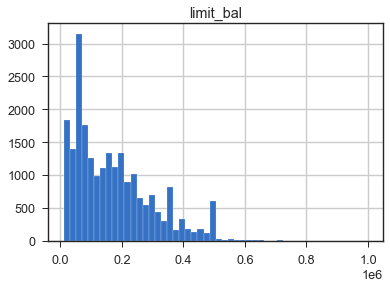

In [16]:
df_train.hist('limit_bal', bins=50)

## VANILLA MODELS

In [17]:
df_van = df_train.copy()

In [18]:
X_van = df_van.drop(columns='default', axis=1)
y_van = df_van['default']

In [137]:
X_train_van, X_test_van, y_train_van, y_test_van = train_test_split(X_van, y_van, random_state=42)

### KNN

In [138]:
params_knn = {
    'n_neighbors': range(1,11,2),
    'weights': ['uniform', 'distance'],
#     'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': range(1,4)
}

In [139]:
CV_knn_van = GridSearchCV(KNeighborsClassifier(), params_knn, n_jobs=-1, scoring='f1', verbose=1)

CV_knn_van.fit(X_train_van, y_train_van)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   53.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 11, 2), 'p': range(1, 4),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [140]:
### Identify the best params 
print(CV_knn_van.best_estimator_)

#Identify the best score during fitting with cross-validation
print(CV_knn_van.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')
0.299417230577995


In [141]:
#predict on the test set
y_pred_knn_van = CV_knn_van.best_estimator_.predict(X_test_van)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test_van, y_pred_knn_van))
print('Test Precision score: ', precision_score(y_test_van, y_pred_knn_van))
print('Test Recall score: ', recall_score(y_test_van, y_pred_knn_van))
print('Test F1 score: ', f1_score(y_test_van, y_pred_knn_van))

Test Accuracy score:  0.6931555555555555
Test Precision score:  0.3048
Test Recall score:  0.3077544426494346
Test F1 score:  0.3062700964630225


In [142]:
results = {}
results['knn_van'] = f1_score(y_test_van, y_pred_knn_van)

### WEIGHTED

In [143]:
param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [.0001, .001, .01, .1, 1.0, 10.0, 100.0],
    'solver': ['sag', 'saga', 'liblinear'],
}

In [144]:
#create a grid search object and fit it to the data
CV_van_weight = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                      param_grid, n_jobs=-1, scoring='f1', verbose=1)

CV_van_weight.fit(X_train_van, y_train_van)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 163 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   43.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [145]:
### Identify the best params 
print(CV_van_weight.best_estimator_)

#Identify the best score during fitting with cross-validation
print(CV_van_weight.best_score_)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
0.5235312839413477


In [146]:
#predict on the test set
y_pred_van_weight = CV_van_weight.best_estimator_.predict(X_test_van)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test_van, y_pred_van_weight))
print('Test Precision score: ', precision_score(y_test_van, y_pred_van_weight))
print('Test Recall score: ', recall_score(y_test_van, y_pred_van_weight))
print('Test F1 score: ', f1_score(y_test_van, y_pred_van_weight))

Test Accuracy score:  0.7774222222222222
Test Precision score:  0.4953083109919571
Test Recall score:  0.5969305331179321
Test F1 score:  0.5413919413919414


In [147]:
results['weight_van'] = f1_score(y_test_van, y_pred_van_weight)

### DECISION TREE

In [148]:
# creating our parameters to test
params_dtc_van = {'max_depth': range(1,16),
                  'max_features': range(1,16),
#                   'min_samples_split': [.9, .8, .7, .6, .5],
#                   'min_samples_leaf': [.00001, .0001, .001, .01, .1],
           }

#create our estimaor
CV_tree_van = DecisionTreeClassifier(random_state=42, class_weight='balanced')

#create the instance of GridSearchCV using the F1 metric for our scoring. 
grid_tree_van = GridSearchCV(CV_tree_van, params_dtc_van, cv=7, scoring='f1', n_jobs=-1, verbose=1)

In [149]:
#fit the Gridsearch to our data
grid_tree_van.fit(X_train_van, y_train_van)

Fitting 7 folds for each of 225 candidates, totalling 1575 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 1575 out of 1575 | elapsed:   11.6s finished


GridSearchCV(cv=7, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_

In [150]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree_van.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree_van.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree_van.best_estimator_)

0.4957329341278624
{'max_depth': 6, 'max_features': 13}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=6, max_features=13, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [151]:
#Predict the response for test dataset
y_pred_tree_van = grid_tree_van.best_estimator_.predict(X_test_van)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test_van, y_pred_tree_van))
print('Test Precision score: ', precision_score(y_test_van, y_pred_tree_van))
print('Test Recall score: ', recall_score(y_test_van, y_pred_tree_van))
print('Test F1 score: ', f1_score(y_test_van, y_pred_tree_van))

Test Accuracy score:  0.7402666666666666
Test Precision score:  0.43725379853685986
Test Recall score:  0.6276252019386107
Test F1 score:  0.5154228855721392


In [152]:
results['tree_van'] = f1_score(y_test_van, y_pred_tree_van)

### RANDOM FOREST

In [153]:
#create a dictionary of all the parameters you want to tune
params_forest = { 
    'max_depth': range(3,14),
    'max_features': range(3,11),
#     'min_samples_split': (.9,.8,.7,.6,.5),
#     'min_samples_leaf': (.001,.01,.1),
#     'n_estimators': (100, 250, 500)
}

In [154]:
#create a grid search object and fit it to the data
forest_van = RandomForestClassifier(random_state=42, n_estimators=100)
CV_forest_van = GridSearchCV(forest_van, params_forest, scoring='f1', n_jobs=-1, verbose=2)
CV_forest_van.fit(X_train_van, y_train_van)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                               

In [155]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(CV_forest_van.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(CV_forest_van.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(CV_forest_van.best_estimator_)

0.4526992345418356
{'max_depth': 10, 'max_features': 10}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [156]:
#Predict the response for test dataset
y_pred_forest_van = CV_forest_van.best_estimator_.predict(X_test_van)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test_van, y_pred_forest_van))
print('Test Precision score: ', precision_score(y_test_van, y_pred_forest_van))
print('Test Recall score: ', recall_score(y_test_van, y_pred_forest_van))
print('Test F1 score: ', f1_score(y_test_van, y_pred_forest_van))

Test Accuracy score:  0.8177777777777778
Test Precision score:  0.663093415007657
Test Recall score:  0.34975767366720517
Test F1 score:  0.4579587519830777


In [157]:
results['forest_van'] = f1_score(y_test_van, y_pred_forest_van)

In [158]:
results

{'knn_van': 0.3062700964630225,
 'weight_van': 0.5413919413919414,
 'tree_van': 0.5154228855721392,
 'forest_van': 0.4579587519830777}

## FEATURE CREATION/SELECTION

In [159]:
# import seaborn as sns
# sns.set(style="ticks")

# sns.pairplot(df_train, hue="default")

In [160]:
df_train['default'].corr(df_train['limit_bal'])

-0.15085541691276222

In [161]:
# df_train['sum_paycodes'] = df_train['pay_1'] + df_train['pay_2'] + df_train['pay_3'] + df_train['pay_4'] + df_train['pay_5'] + df_train['pay_6']
# df_train['limit_paycodes'] = df_train['limit_bal'] * df_train['sum_paycodes'].apply(lambda x: x-.01)

In [162]:
# df_train['limit_paycodes'].describe()

In [163]:
# df_train.hist('limit_paycodes', bins=100)

In [164]:
# df_train['default'].corr(df_train['limit_paycodes'])

In [165]:
df_train['avg_bill'] = (df_train['bill_amt1'] + df_train['bill_amt2'] + df_train['bill_amt3'] + df_train['bill_amt4'] + df_train['bill_amt5'] + df_train['bill_amt6']).apply(lambda x: x/6)
df_train['avg_pay'] = (df_train['pay_amt1'] + df_train['pay_amt2'] + df_train['pay_amt3'] + df_train['pay_amt4'] + df_train['pay_amt5'] + df_train['pay_amt6']).apply(lambda x: x/6)


KeyError: 'bill_amt1'

In [ ]:
df_train['avg_bill'].describe()

In [ ]:
df_train['avg_pay'].describe()

In [ ]:
df_train['avg_bill'].hist(bins=100)

In [ ]:
df_train['avg_pay'].hist(bins=100)

In [ ]:
df_train.plot.scatter('default', 'avg_pay')

In [ ]:
# to_bin = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# for col in to_bin:
#     conditions = [df_train[col] <= 0, df_train[col] > 0]
#     choices = [0, 1]
#     df_train[col + '_bin'] = np.select(conditions, choices, df_train[col])

In [ ]:
# bin_cols = ['pay_1_bin', 'pay_2_bin', 'pay_3_bin', 'pay_4_bin', 'pay_5_bin', 'pay_6_bin']

# for col in bin_cols:
#     print('-------------------------------')
#     print(df_train.groupby('default')[col].value_counts(normalize=True))
#     print('-------------------------------')

In [ ]:
# print('Paycode 1 Summary')

# print('\n')
# print(df_train.groupby(['pay_1_bin','default']).pay_1_bin.count().unstack())

# # Passenger class visualization
# pay1_bin = df_train.groupby(['pay_1_bin','default']).pay_1_bin.count().unstack()
# p1 = pay1_bin.plot(kind = 'bar', stacked = True, 
#                    title = 'Paycodes Binned: Defaulters vs Non-Defaulters', 
#                    color = ['grey','lightgreen'], alpha = .70)
# p1.set_xlabel('Paycode 1')
# p1.set_ylabel('# Users')
# p1.legend(['Did Not Default','Defaulted'])
# plt.show()

In [ ]:
# print('Paycode 2 Summary')

# print('\n')
# print(df_train.groupby(['pay_2_bin','default'])['pay_2_bin'].count().unstack())

# pay2 = df_train.groupby(['pay_2_bin','default'])['pay_2_bin'].count().unstack()
# p2 = pay2.plot(kind = 'bar', stacked = True, 
#                    title = 'Paycode 2: Survivors vs Non-Survivors', 
#                    color = ['grey','lightgreen'], alpha = .70)
# p2.set_xlabel('Paycode 2')
# p2.set_ylabel('# Users')
# p2.legend(['Did Not Default','Defaulted'])
# plt.show()

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df_train['avg_bill'].corr(df_train['bill_amt2'])

In [ ]:
df_train['bill_pct'] = df_train['avg_bill'] / df_train['limit_bal']
df_train['bill_pct'].describe()

In [ ]:
to_drop = ['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']

df_train.drop(columns=to_drop, inplace=True)

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(44, 36))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr_matrix = df_train.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

sol[sol > .8]

In [ ]:
corr_drop = ['pay_1_8', 'pay_4_8', 'pay_5_7', 'pay_2_7', 'pay_1_7', 'pay_2_0', 'pay_6_7']
df_train.drop(columns=corr_drop, inplace=True)

In [ ]:
y = df_train['default']
X = df_train.drop(columns=['default'], axis=1)
X.head()

In [ ]:
X.columns

In [ ]:
def find_extremes(df):
    '''Takes in a dataframe and returns a list of columns with values farther than 4 standard deviations from the mean.'''
    extreme_list = []
    for column in list(df.columns):
        if (df[column].max() > (df[column].mean() + 4*df[column].std())) or (df[column].min() < (df[column].mean() - 4*df[column].std())):
            extreme_list.append(column)
    return extreme_list

def rein_extremes(df, columns):
    '''Takes in a dataframe and a list of columns and changes any values farther than 4 standard deviations from the mean
    to 4 standard deviations from the mean.
    Overwrites the input column!'''
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        conditions = [df[column] > mean + 4*std,
                      df[column] < mean - 4*std]
        choices = [mean + 4*std,
                   mean - 4*std]
        df[column] = np.select(conditions, choices, df[column])

In [ ]:
extreme_cols = find_extremes(X)
extremes = extreme_cols[:8]
extremes.extend(extreme_cols[-3:])
extremes

In [ ]:
# Remove target variable, so we don't replace any values.

X[extremes].describe()

In [ ]:

rein_extremes(X, extremes)
X[extremes].describe()

In [ ]:
X_sm = sm.add_constant(X)
est = sm.OLS(y, X_sm)
est2 = est.fit()
print(est2.summary())

In [ ]:
p = est2.pvalues
high_p = p[p > .05].keys()

X_high_p = X.drop(columns=high_p)

X_high_p.head()

In [ ]:
X_sm2 = sm.add_constant(X_high_p)
est = sm.OLS(y, X_sm2)
est2 = est.fit()
print(est2.summary())

## INTERACTIONS

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

# polynomial_features_2 = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = polynomial_features_2.fit_transform(X)
# poly_columns = polynomial_features_2.get_feature_names(X.columns)

# X_poly = pd.DataFrame(X_poly, columns=poly_columns)
# X_poly.head()

In [ ]:
# X_poly_cols = [col.replace(' ', '_') for col in X_poly.columns]
# X_poly.columns = X_poly_cols

In [ ]:
# # Create correlation matrix
# corr_matrix = X_poly.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# upper

In [ ]:
# # Find index of feature columns with correlation greater than 0.90
# to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
# X_poly.drop(columns=to_drop, inplace=True)
# X_poly.shape


In [ ]:
# X_poly.head()

In [ ]:
# sns.set(style="white")

# # Compute the correlation matrix
# corr = X_poly.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(44, 36))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:



# X_poly_2 = sm.add_constant(X_poly)
# est = sm.OLS(y, X_poly_2)
# est2 = est.fit()
# print(est2.summary())

In [ ]:
# result.summary()

In [ ]:
# p = est2.pvalues
# high_p = p[p > .2].keys()

# X_poly_simplified = X_poly.drop(columns=high_p)
# X_poly_simplified.drop(columns=['education_2_education_3', 'education_2_education_4', 'education_3_education_4'],
#                       inplace=True)
# X_poly_simplified.head()

In [ ]:
# X_poly_2 = sm.add_constant(X_poly_simplified)
# est = sm.OLS(y, X_poly_2)
# est2 = est.fit()
# print(est2.summary())

In [ ]:
# p = est2.pvalues
# high_p = p[p > .2].keys()

# X_poly_simplified = X_poly_simplified.drop(columns=high_p)
# # X_poly_simplified.drop(columns=poly_drop,
# #                       inplace=True)
# X_poly_simplified.head()

In [ ]:
# X_poly_2 = sm.add_constant(X_poly_simplified)
# est = sm.OLS(y, X_poly_2)
# est2 = est.fit()
# print(est2.summary())

In [ ]:
# sns.set(style="white")

# # Compute the correlation matrix
# corr = X_poly_simplified.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(44, 36))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

## TRAIN-TEST SPLIT

In [166]:
X_high_p.head()

,limit_bal,sex,marriage,age,pay_amt1,pay_amt2,pay_amt3,pay_amt5,pay_amt6,education_4,...,pay_4_6,pay_5_2,pay_6_minus_1,pay_6_0,pay_6_3,pay_6_6,pay_6_8,avg_bill,avg_pay,bill_pct
0,200000.0,0.0,1.0,30.0,6600.0,6000.0,5860.0,5000.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,146221.333333,4910.000000,0.731107
1,200000.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,20000.0,0.0,0.0,28.0,3353.0,3.0,5101.0,6530.0,8103.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6543.833333,3849.333333,0.327192
3,50000.0,1.0,0.0,23.0,4175.0,41000.0,51705.0,718.0,700.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,39625.000000,16499.666667,0.792500
4,20000.0,1.0,1.0,47.0,780.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.000000,130.000000,0.009750


In [363]:
X_train, X_test, y_train, y_test = train_test_split(X_high_p, y, random_state=42, stratify=y)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

### Baseline

In [168]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
y_pred = logreg.predict(X_test)

print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.4668071654373024
0.8200888888888889
0.6712121212121213
0.3578352180936995


In [170]:
results['baseline'] = (f1_score(y_test, y_pred))

In [171]:
lr_coef_df = pd.DataFrame(data=logreg.coef_)
lr_coef_df.columns = X_high_p.columns
lr_coef_df = lr_coef_df.T.sort_values(by=0).T
lr_coef_df.T

,0
pay_amt1,-0.207741
pay_amt2,-0.184321
pay_6_0,-0.178487
limit_bal,-0.163043
pay_1_0,-0.132048
education_4,-0.125845
pay_amt3,-0.114432
pay_amt5,-0.096722
pay_amt6,-0.094601
pay_6_minus_1,-0.085394


In [172]:
sorted_df = lr_coef_df.T
sorted_df.iloc[sorted_df[0].abs().argsort()][::-1].tail(10)

,0
pay_4_4,0.047412
pay_4_5,-0.045740
pay_2_3,0.043727
pay_3_6,0.043401
pay_2_4,-0.043054
pay_6_3,0.041093
pay_3_3,0.035483
pay_6_6,0.032107
pay_1_5,0.031976
pay_4_6,-0.027905


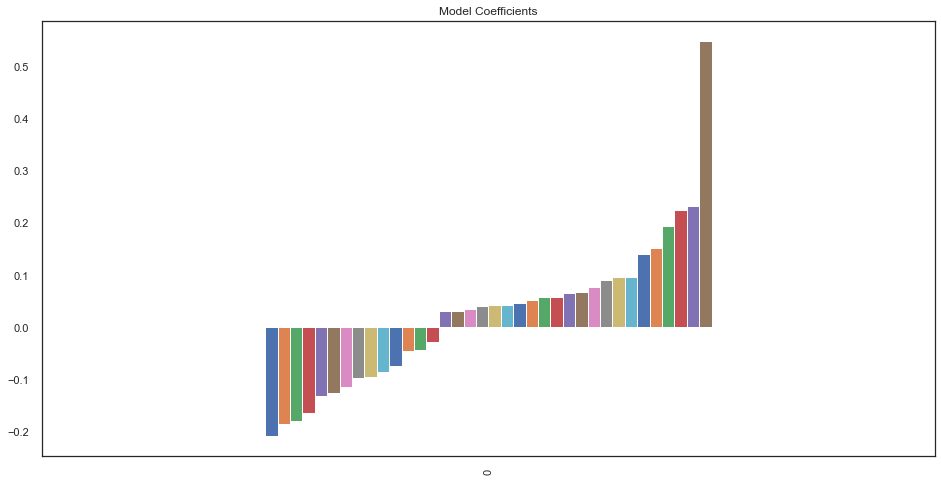

In [173]:
lr_coefs = sum(sorted_df[0].abs())
lr_coef_df.plot(kind='bar', title='Model Coefficients', legend=False, figsize=(16,8))

## GRIDSEARCH SETUP

In [311]:
param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [.00001, .0001, .001, .01, .1, 1, 8],
    'solver': ['sag', 'saga', 'liblinear', 'lbfgs'],
#     'class_weight': [{1:}]
}

param_grid2 = { 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': range(1,10),
    'solver': ['sag', 'saga', 'liblinear', 'lbfgs'],
#     'class_weight': [{1:}]
}

param_grid3 = { 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [round(0.00145+(.00005*i), 5) for i in range(7)],
    'solver': ['sag', 'saga', 'liblinear', 'lbfgs'],
#     'class_weight': [{1:}]
}


### Class imbalance treatment

### SMOTE

In [373]:
smoten = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smoten.fit_sample(X_train, y_train)

In [374]:
CV_smote = GridSearchCV(LogisticRegression(random_state=42),
                      param_grid, n_jobs=-1, scoring='f1', verbose=1)
CV_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   28.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 8],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'liblinear', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [375]:
### Identify the best params 
print(CV_smote.best_estimator_)

#Identify the best score during fitting with cross-validation
print(CV_smote.best_score_)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
0.6626633133359248


In [376]:
y_pred_smote = CV_smote.best_estimator_.predict(X_test)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_smote))
print('Test Precision score: ', precision_score(y_test, y_pred_smote))
print('Test Recall score: ', recall_score(y_test, y_pred_smote))
print('Test F1 score: ', f1_score(y_test, y_pred_smote))

Test Accuracy score:  0.744
Test Precision score:  0.44633077765607887
Test Recall score:  0.655144694533762
Test F1 score:  0.5309446254071661


In [310]:
results['smote'] = f1_score(y_test, y_pred_smote)

In [181]:
# print(confusion_matrix(y_test, y_pred_smote))

### Weighted

In [379]:
params_weight = { 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [round(0.00125+(.00005*i), 5) for i in range(10)],
    'solver': ['sag', 'saga', 'liblinear', 'lbfgs'],
#     'class_weight': [{1:}]
}

# [round(0.00145+(.00005*i), 5) for i in range(7)]
# [.0001, .00015, .000175, .0002, .00025, .0003]

In [380]:
#create a grid search object and fit it to the data

CV_weighted = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                      params_weight, n_jobs=-1, scoring='f1', verbose=2)
CV_weighted.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   15.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.00125, 0.0013, 0.00135, 0.0014, 0.00145,
                               0.0015, 0.00155, 0.0016, 0.00165, 0.0017],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'liblinear', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [381]:

### Identify the best params 
print(CV_weighted.best_estimator_)


#Identify the best score during fitting with cross-validation
print(CV_weighted.best_score_)

LogisticRegression(C=0.00155, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
0.5207217777652696


In [382]:
#predict on the test set

y_pred_weighted = CV_weighted.best_estimator_.predict(X_test)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_weighted))
print('Test Precision score: ', precision_score(y_test, y_pred_weighted))
print('Test Recall score: ', recall_score(y_test, y_pred_weighted))
print('Test F1 score: ', f1_score(y_test, y_pred_weighted))

Test Accuracy score:  0.7784888888888889
Test Precision score:  0.49934296977660975
Test Recall score:  0.6109324758842444
Test F1 score:  0.549530007230658


In [348]:
results['weighted'] = f1_score(y_test, y_pred_weighted)

### Weighted simplified

In [ ]:
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=1)

# scaler = StandardScaler()  
# scaler.fit(X_train2)

# X_train2 = scaler.transform(X_train2)  
# X_test2 = scaler.transform(X_test2)

In [ ]:
# #create a grid search object and fit it to the data

# CV_weighted2 = GridSearchCV(LogisticRegression(class_weight='balanced'),
#                       param_grid, n_jobs=-1, scoring='f1', verbose=2)
# CV_weighted2.fit(X_train2, y_train2)

In [ ]:
# ### Identify the best params 
# print(CV_weighted2.best_estimator_)


# #Identify the best score during fitting with cross-validation
# print(CV_weighted2.best_score_)

In [ ]:
# #predict on the test set

# y_pred_weighted2 = CV_weighted2.best_estimator_.predict(X_test2)

# # checking metrics
# print('Test Accuracy score: ', metrics.accuracy_score(y_test2, y_pred_weighted2))
# print('Test Precision score: ', metrics.precision_score(y_test2, y_pred_weighted2))
# print('Test Recall score: ', metrics.recall_score(y_test2, y_pred_weighted2))
# print('Test F1 score: ', metrics.f1_score(y_test2, y_pred_weighted2))

In [ ]:
# results['weighted_simp'] = f1_score(y_test2, y_pred_weighted2)

### DECISION TREE

In [204]:
# creating our parameters to test
params_dtc = {'max_depth': range(1,11),
                  'max_features': range(5,21),
#               'criterion': ['gini', 'entropy'],
#                   'min_samples_split': [.9, .8, .7, .6, .5],
                  'min_samples_leaf': [.000001, .0000001,],
           }

#create our estimaor
d_tree = DecisionTreeClassifier(random_state=42)

#create the instance of GridSearchCV using the F1 metric for our scoring. 
CV_tree = GridSearchCV(d_tree, params_dtc, scoring='f1', n_jobs=-1, verbose=1)

In [205]:
#fit the Gridsearch to our data
CV_tree.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1360 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    9.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'm

In [206]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(CV_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(CV_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(CV_tree.best_estimator_)

0.4721695477935116
{'max_depth': 3, 'max_features': 9, 'min_samples_leaf': 1e-06}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1e-06, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [207]:
#Predict the response for test dataset
y_pred_tree = CV_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("F1 Score:", f1_score(y_test, y_pred_tree))

F1 Score: 0.48709526044110746


In [208]:
results['d_tree'] = f1_score(y_test, y_pred_tree)

In [209]:
imp_tree = CV_tree.best_estimator_.feature_importances_

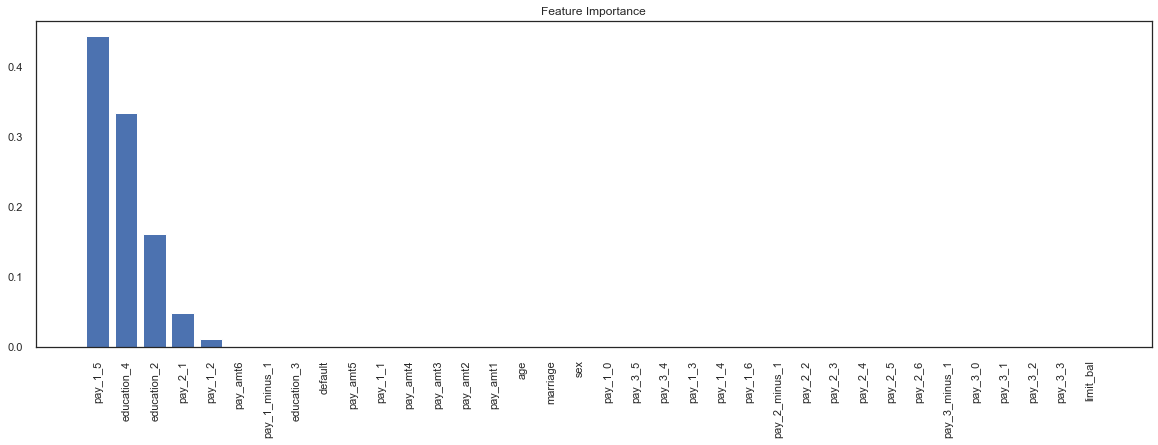

In [210]:
# Sort feature importances in descending order
indices_tree = np.argsort(imp_tree)[::-1]

# Rearrange feature names so they match the sorted feature importances
names_tree = [df_train.columns[i] for i in indices_tree]

# Create plot
plt.figure(figsize=(20,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_high_p.shape[1]), imp_tree[indices_tree])

# Add feature names as x-axis labels
plt.xticks(range(X_high_p.shape[1]), names_tree, rotation=90)

# Show plot
plt.show()

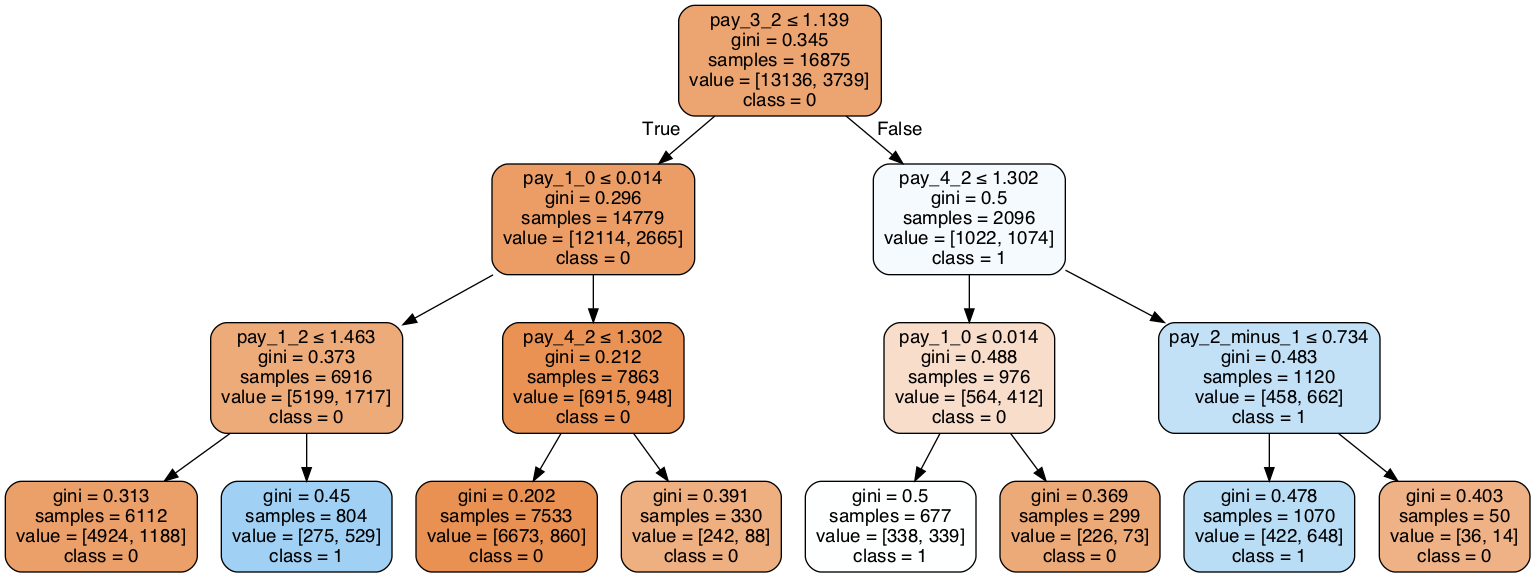

In [211]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

feature_cols = X_high_p.columns
dot_data = StringIO()
export_graphviz(CV_tree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('titanic.png')
Image(graph.create_png())

### RANDOM FOREST

In [214]:
#create a dictionary of all the parameters you want to tune
params_forest = { 
    'max_depth': range(3,11),
    'max_features': range(12,19),
#     'min_samples_split': (.001,.01,.1,.2),
    'min_samples_leaf': (.000001,.00001,.0001),
#     'n_estimators': (100, 250, 500)
}

In [215]:
#create a grid search object and fit it to the data
forest = RandomForestClassifier(random_state=42, n_estimators=100)
CV_forest = GridSearchCV(forest, params_forest, scoring='f1', n_jobs=-1, verbose=2)
CV_forest.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  7.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                               

In [216]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(CV_forest.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(CV_forest.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(CV_forest.best_estimator_)

0.451938940111123
{'max_depth': 10, 'max_features': 18, 'min_samples_leaf': 1e-06}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=18,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1e-06, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [217]:
#Predict the response for test dataset
y_pred_forest = CV_forest.best_estimator_.predict(X_test)

# checking metrics
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_forest))
print('Test Precision score: ', precision_score(y_test, y_pred_forest))
print('Test Recall score: ', recall_score(y_test, y_pred_forest))
print('Test F1 score: ', f1_score(y_test, y_pred_forest))

Test Accuracy score:  0.8200888888888889
Test Precision score:  0.6671597633136095
Test Recall score:  0.364297253634895
Test F1 score:  0.471264367816092


In [218]:
results['forest'] = f1_score(y_test, y_pred_forest)

In [219]:
imp_forest = CV_forest.best_estimator_.feature_importances_

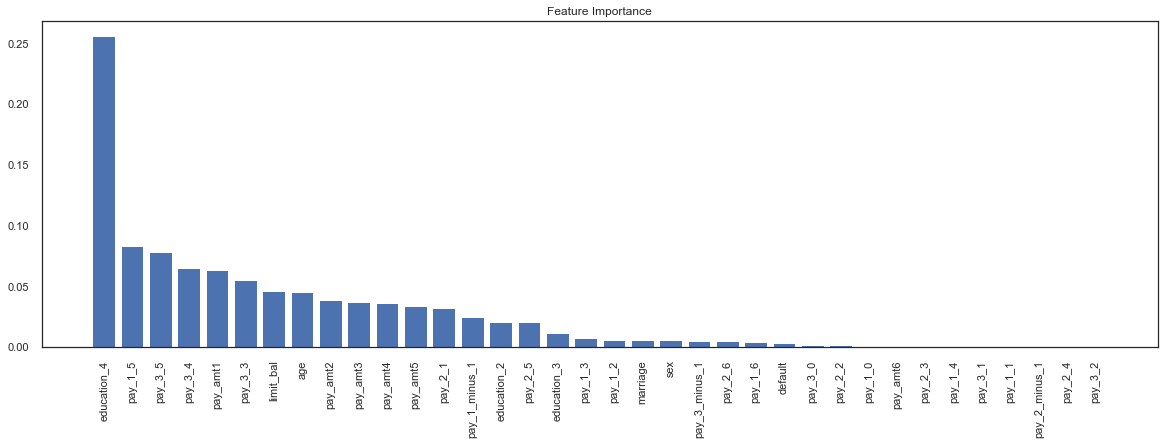

In [221]:
imp_forest = CV_forest.best_estimator_.feature_importances_
# Sort feature importances in descending order
indices_forest = np.argsort(imp_forest)[::-1]

# Rearrange feature names so they match the sorted feature importances
names_forest = [df_train.columns[i] for i in indices_forest]

# Create plot
plt.figure(figsize=(20,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_high_p.shape[1]), imp_forest[indices_forest])

# Add feature names as x-axis labels
plt.xticks(range(X_high_p.shape[1]), names_forest, rotation=90)

# Show plot
plt.show()

### ENSEMBLE - VOTING

In [222]:
from sklearn.ensemble import VotingClassifier

In [377]:


voting_clf = VotingClassifier(
                estimators=[('lr', CV_weighted.best_estimator_),
                            ('smote', CV_smote.best_estimator_),
                            ('lr_van', lr_voting),
#                             ('tree', grid_tree_van.best_estimator_)
                           ], 
                voting='hard')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

print('Test Accuracy score: ', accuracy_score(y_test, vc_preds))
print('Test Precision score: ', precision_score(y_test, vc_preds))
print('Test Recall score: ', recall_score(y_test, vc_preds))
print('Test F1 score: ', f1_score(y_test, vc_preds))

Test Accuracy score:  0.7831111111111111
Test Precision score:  0.5080862533692723
Test Recall score:  0.6061093247588425
Test F1 score:  0.5527859237536656


In [353]:
results['ensemble_multiple'] = f1_score(y_test, vc_preds)

### ENSEMBLE WEIGHTED LR

In [225]:
param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [.0001, .0005, .001, .01, .1, 1.0, 10.0],
    'solver': ['sag', 'saga', 'liblinear', 'lbfgs'],
#     'class_weight': [{1:}]
}

In [369]:
C_param_range = [round(0.00145+(.00005*i), 5) for i in range(7)]
titles = titles_test = [f'lr_0_{str(x)[2:]}' for x in C_test]

In [370]:
# C_param_range = [ 
# #     .00001,
#                  .00015, .00025, .0005, .00075, .001, .0025, .005,
# #                  .01, .05, .1, .5, 1, 5
#                 ]
# titles = [
# #     'lr_0_00001',
#           'lr_0_00015', 'lr_0_00025', 'lr_0_0005', 'lr_0_0075', 'lr_0_001', 'lr_0_0025', 'lr_0_005', 
# #           'lr_0_01', 'lr_0_05', 'lr_0_1', 'lr_0_5', 'lr_1', 'lr_5'
#          ]

params = dict(zip(titles, C_param_range)) 
models = {}

table = pd.DataFrame(columns = ['C_parameter','F1'])
table['C_parameter'] = C_param_range
j = 0

for k , v  in params.items():
    
    # Create model using different value for c  
    lr = LogisticRegression(penalty = 'l2', C = v, random_state = 42, class_weight='balanced', solver='sag')
    
    #save the model to a dictionary to use later in our voting classifiers
    models[k]= lr
    
    #the steps below this point are unnecessary in order to create a voting classifier, 
    #but it is easy to fit the model and see how performance changes for different levels of regularization
    lr.fit(X_train, y_train)
    
    # Predict using model
    y_preds = lr.predict(X_test)

    # Saving accuracy score in table
    table.iloc[j,1] = f1_score(y_test, y_preds)
    j += 1

In [371]:
table

,C_parameter,F1
0,0.00145,0.552332
1,0.00150,0.552129
2,0.00155,0.552129
3,0.00160,0.551927
4,0.00165,0.552129
5,0.00170,0.552129
6,0.00175,0.552661


In [372]:
lr_voting = VotingClassifier(estimators=list(models.items()), 
                              voting='hard')

lr_voting.fit(X_train, y_train)

lrv_preds = lr_voting.predict(X_test)

print('Test Accuracy score: ', accuracy_score(y_test, lrv_preds))
print('Test Precision score: ', precision_score(y_test, lrv_preds))
print('Test Recall score: ', recall_score(y_test, lrv_preds))
print('Test F1 score: ', f1_score(y_test, lrv_preds))

Test Accuracy score:  0.7829333333333334
Test Precision score:  0.5077650236326806
Test Recall score:  0.6045016077170418
Test F1 score:  0.5519266055045873


In [351]:
results['ensemble_lr'] = f1_score(y_test, lrv_preds)

In [354]:
results

{'knn_van': 0.3062700964630225,
 'weight_van': 0.5413919413919414,
 'tree_van': 0.5154228855721392,
 'forest_van': 0.4579587519830777,
 'baseline': 0.4668071654373024,
 'smote': 0.5293715846994534,
 'weighted': 0.542687453600594,
 'd_tree': 0.48709526044110746,
 'forest': 0.471264367816092,
 'ensemble_multiple': 0.5432924563359346,
 'ensemble_lr': 0.5430267062314541,
 'bag_lr': 0.5372360133382734}

### BAGGING - LR

In [243]:
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor

In [244]:
bc_lr = BaggingClassifier(
            base_estimator=LogisticRegression(random_state=42, class_weight='balanced', C=0.001,
                                              solver='sag', penalty='l2'), 
            n_estimators= 100,
            max_samples= .7,
            max_features= 10,
            oob_score= True
                )

In [245]:
bc_lr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.001,
                                                    class_weight='balanced',
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=42,
                                                    solver='sag', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=10,
                  max_samples=0.7, n_estimators=100, n_jobs=Non

In [246]:
bc_lr.oob_score_

0.7730370370370371

In [247]:
bc_lr_preds = bc_lr.predict(X_test)

bc_lr_f1 = f1_score(y_test, bc_lr_preds)

print(bc_lr_f1)

0.5372360133382734


In [248]:
results['bag_lr'] = f1_score(y_test, bc_lr_preds)

In [378]:
results

{'knn_van': 0.3062700964630225,
 'weight_van': 0.5413919413919414,
 'tree_van': 0.5154228855721392,
 'forest_van': 0.4579587519830777,
 'baseline': 0.4668071654373024,
 'smote': 0.5293715846994534,
 'weighted': 0.542687453600594,
 'd_tree': 0.48709526044110746,
 'forest': 0.471264367816092,
 'ensemble_multiple': 0.5432924563359346,
 'ensemble_lr': 0.5430267062314541,
 'bag_lr': 0.5372360133382734}

### BOOSTS!

In [ ]:
import xgboost as xgb

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
default = pd.concat([X,y], axis=1)
default['default'].mean()

In [ ]:
xgb.XGBClassifier()

In [ ]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 4, 
                           alpha = 1, 
                           scale_pos_weight= default['default'].mean(),
                           n_estimators = 10000)

In [ ]:
xg_clf.fit(X_train,y_train)

In [ ]:
preds = xg_clf.predict(X_test)


test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

In [ ]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [6, 5]
plt.show()

In [ ]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))

    return alg

In [ ]:
default.head()

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
target = 'default'

In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target]]
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.6,
 colsample_bytree=0.3,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

alg = modelfit(xgb1, train, predictors, target)

In [ ]:
preds = alg.predict(X_test)

test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score

In [ ]:
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [ ]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': [100],
              'eta': [.1, .2, .3, .4],
              'subsample': [.7, .75, .8],
              'max_depth': range(2,6),
              'colsample_bytree': [0.7,0.8,0.9],
              'min_child_weight': [1, 2],
              'eval_metric': ['auc'],
              'random_state': [1]
             }

In [ ]:
# initiate the Gridsearch model
CV_xgb = GridSearchCV(
    estimator = clf_xgb,
    param_grid = param_dist, 
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)

In [ ]:
CV_xgb.fit(train[predictors],train[target])

In [ ]:
print('Best parameters: ', CV_xgb.best_params_)
print('---------------------------------------------------')
print('Best score: ', CV_xgb.best_score_)

In [ ]:
y_xgb_preds = CV_xgb.best_estimator_.predict(X_test)


print('Accuracy: ', accuracy_score(y_test, y_xgb_preds))
print('F1 Score: ', f1_score(y_test, y_xgb_preds))
print('AUC: ', roc_auc_score(y_test, y_xgb_preds))

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(20,10))
xgb.plot_importance(CV_xgb.best_estimator_, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

params = {"objective":"binary:logistic",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 3, 
          'alpha': 1}

cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=5,
                    num_boost_round=500,
                    early_stopping_rounds=5,
                    metrics="logloss", 
                    as_pandas=True, 
                    seed=123)

In [ ]:
cv_results

In [ ]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': [100],
              'learning_rate': [0.05, 0.075],
              'max_depth': range(3,6),
              'grow_policy': ['lossguide'],
              'max_leaves': range(3,7),
#               'colsample_bytree': [0.5,0.45,0.4],
              'min_child_weight': range(2,5)
             }

In [ ]:
# initiate the Gridsearch model
gsearch1 = GridSearchCV(
    estimator = clf_xgb,
    param_grid = param_dist, 
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)

In [ ]:
gsearch1.fit(X_train, y_train)

In [ ]:
print('Params: ', gsearch1.best_params_)

print('------------------------------')

print('Score: ', gsearch1.best_score_)

In [ ]:
xg_preds = gsearch1.best_estimator_.predict(X_test)


test_f1 = f1_score(y_test, xg_preds)
test_acc = accuracy_score(y_test, xg_preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

In [ ]:
print(roc_auc_score(y_test, xg_preds))

In [ ]:
from xgboost import plot_importance

plot_importance(gsearch1.best_estimator_)

In [ ]:
gsearch1.best_estimator_.get_booster().get_fscore()

In [384]:
fpr_knn_van, tpr_knn_van, threshold_knn_van = roc_curve(y_test_van, y_pred_knn_van)
fpr_weight_van, tpr_weight_van, threshold_weight_van = roc_curve(y_test_van, y_pred_van_weight)
fpr_tree_van, tpr_tree_van, threshold_tree_van = roc_curve(y_test_van, y_pred_tree_van)
fpr_forest_van, tpr_forest_van, threshold_forest_van = roc_curve(y_test_van, y_pred_forest_van)

fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_smote)
fpr_weighted, tpr_weighted, thresholds_weighted = roc_curve(y_test, y_pred_weighted)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_tree)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_pred_forest)
fpr_vote, tpr_vote, thresholds_vote = roc_curve(y_test, vc_preds)
fpr_ens_weight, tpr_ens_weight, thresholds_ens_weight = roc_curve(y_test, lrv_preds)
fpr_bag, tpr_bag, thresholds_bag = roc_curve(y_test, bc_lr_preds)


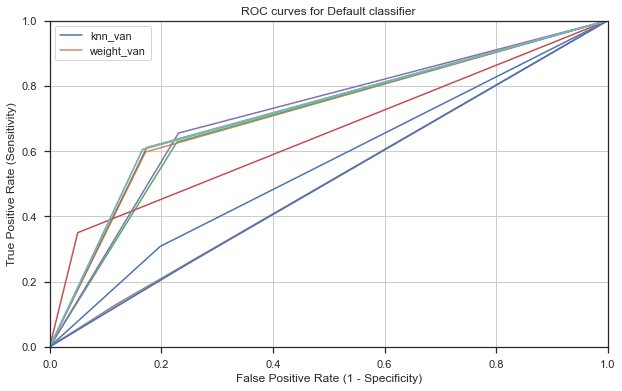

In [391]:
plt.figure(figsize=(10,6))

plt.plot(fpr_knn_van, tpr_knn_van, label='knn_van')
plt.plot(fpr_weight_van, tpr_weight_van, label='weight_van')
plt.plot(fpr_tree_van, tpr_tree_van)
plt.plot(fpr_forest_van, tpr_forest_van)
plt.plot(fpr_smote, tpr_smote)
plt.plot(fpr_weighted, tpr_weighted)
plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_forest, tpr_forest)
plt.plot(fpr_vote, tpr_vote)
plt.plot(fpr_ens_weight, tpr_ens_weight)
plt.plot(fpr_bag, tpr_bag)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curves for Default classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

In [392]:
print(roc_auc_score(y_test_van, y_pred_knn_van))
print(roc_auc_score(y_test_van, y_pred_van_weight))
print(roc_auc_score(y_test_van, y_pred_tree_van))
print(roc_auc_score(y_test_van, y_pred_forest_van))
print(roc_auc_score(y_test, y_pred_smote))
print(roc_auc_score(y_test, y_pred_weighted))
print(roc_auc_score(y_test, y_pred_tree))
print(roc_auc_score(y_test, y_pred_forest))
print(roc_auc_score(y_test, vc_preds))
print(roc_auc_score(y_test, lrv_preds))
print(roc_auc_score(y_test, bc_lr_preds))

0.5548345953844391
0.7126435204910381
0.6998394986214594
0.6498047543170765
0.7121877318822655
0.7184997919252312
0.5038746127497357
0.5054180174401152
0.7197403505784625
0.7190506212518101
0.503556537254191


In [ ]:
fuuuuuuuck 

In [ ]:
lr_clf_weighted = LogisticRegression(solver='liblinear', class_weight='balanced')

lr_clf_weighted.fit(X_train, y_train)

y_pred_weighted = lr_clf_weighted.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_weighted))
print('Test Precision score: ', metrics.precision_score(y_test, y_pred_weighted))
print('Test Recall score: ', metrics.recall_score(y_test, y_pred_weighted))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_weighted))

In [ ]:
lr_coef_df = pd.DataFrame(data=CV_weighted.best_estimator_.coef_)
lr_coef_df.columns = X_poly_simplified.columns
lr_coef_df = lr_coef_df.T.sort_values(by=0).T

sorted_df = lr_coef_df.T
sorted_df.iloc[sorted_df[0].abs().argsort()][::-1].tail(20)

In [ ]:
poly_drop = list(sorted_df[sorted_df[0].abs() < .025].index)

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_weighted))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_weighted)
classes = ['No Default', 'Defaulted']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
lr_clf_coef_df = pd.DataFrame(data=lr_clf_weighted.coef_)
lr_clf_coef_df.columns = X_poly.columns
lr_clf_coef_df = lr_clf_coef_df.T.sort_values(by=0).T
lr_clf_coef_df.T

In [ ]:
list(sorted_df2[sorted_df2[0].abs() < .01].index)

In [ ]:
sorted_df2 = lr_clf_coef_df.T
sorted_df2.iloc[sorted_df2[0].abs().argsort()][::-1].tail(20)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# neighbors = list(range(1,16,2))
# algos = ['ball_tree', 'kd_tree', 'brute']
# p = list(range(1,6))
# weight = ['uniform', 'distance']
# params = {'n_neighbors': neighbors, 'algorithm': algos, 'p': p, 'weights': weight}
# grid_k = GridSearchCV(KNeighborsClassifier(), params, scoring='f1', verbose=1, n_jobs=-1, cv=7)
# grid_k.fit(X_train, y_train)

In [ ]:
# # examine the best model
# print(grid_k.best_score_)
# print(grid_k.best_params_)
# print(grid_k.best_estimator_)

In [ ]:
print(metrics.confusion_matrix(y_test, rfc_pred))

In [ ]:
results = {}

results['imbalanced'] = (accuracy_score(y_test, y_pred_test), f1_score(y_test, y_pred_test))

In [ ]:
df_train.hist('limit_bal')

In [ ]:
#create a list of parameters to check 
parameter_dict={'min_samples_leaf':[.01,.05,.1], 'max_depth':range(1,11), 'min_impurity_decrease':[.01,.05,.1]}

#create our estimaor
reg_tree=DecisionTreeRegressor(random_state=1)

In [ ]:
#create the instance of GridSearchCV
grid_tree=GridSearchCV(reg_tree, parameter_dict, cv=5, verbose=1, scoring='neg_mean_squared_error')

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

In [ ]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

In [ ]:
from sklearn.metrics import mean_squared_error

#Predict the response for test dataset
y_pred_tree = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Testing Metric:", metrics.mean_squared_error(y_test, y_pred_tree))

In [ ]:
df_train.boxplot('sum_paycodes', 'default', showfliers=False)

In [ ]:
df_train.boxplot('pay_1', 'default', showfliers=False)

In [ ]:
conditions = [df_train.pay_1 <= 0, df_train.pay_1 > 0]
choices = [0, 1]

print(df_train.pay_1.value_counts())
df_train['pay1_simplified'] = np.select(conditions, choices, df_train.pay_1)
print(df_train.pay1_simplified.value_counts())

In [ ]:
df_train.groupby('default').pay1_simplified.value_counts(normalize=True)

In [ ]:
conditions = [df_train.pay_2 <= 0, df_train.pay_2 > 0]
choices = [0, 1]

print(df_train.pay_2.value_counts())
df_train['pay2_simplified'] = np.select(conditions, choices, df_train.pay_2)
print(df_train.pay2_simplified.value_counts())

In [ ]:
df_train.groupby('default').pay2_simplified.value_counts(normalize=True)

In [ ]:
df_train.head()

In [ ]:
df_train.groupby('default').sum_paycodes.describe()

In [ ]:
df_train.boxplot('age', 'default', showfliers=False)

In [ ]:
plt.scatter(x = df_train[df_train['default']==0].sum_paycodes.head(1000), y = df_train[df_train['default']==0].limit_bal.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].sum_paycodes.head(1000), y = df_train[df_train['default']==1].limit_bal.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('Age')
plt.ylabel('CC Limit')
plt.title('Age vs CC Limit')
plt.legend()

plt.show()

In [ ]:
df_train.hist('bill_amt1')

* drop pay_amt6
* drop bill_amt2, drop bill_amt4, drop bill_amt6

In [ ]:
df_train['']

In [ ]:
df_train.iloc[:,5:].head(20)

In [ ]:
df_train.iloc[:,5:].corr()

In [ ]:
df_train.plot.scatter('PAY_0', 'default payment next month')

In [ ]:
cols =[]
for i in df_train:
    cols.append(i)

In [ ]:
n = 4
row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df_train, y_vars=['default payment next month'],x_vars=i, kind='reg', height=3)

In [ ]:
df_train.hist('AGE')

In [ ]:
plt.scatter(x = df_train[df_train['default']==0].age.head(1000), y = df_train[df_train['default']==0].limit_bal.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].age.head(1000), y = df_train[df_train['default']==1].limit_bal.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('Age')
plt.ylabel('CC Limit')
plt.title('Age vs CC Limit')
plt.legend()

plt.show()

In [ ]:
plt.scatter(x = df_train[df_train['default']==0].age.head(1000), y = df_train[df_train['default']==0].pay_1.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].age.head(1000), y = df_train[df_train['default']==1].pay_1.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('Age')
plt.ylabel('Payment Code 1')
plt.title('Age vs Payment Code 1')
plt.legend()

plt.show()

In [ ]:
plt.scatter(x = df_train[df_train['default']==0].limit_bal.head(1000), y = df_train[df_train['default']==0].pay_1.head(1000),
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Default')
plt.scatter(x = df_train[df_train['default']==1].limit_bal.head(1000), y = df_train[df_train['default']==1].pay_1.head(1000),
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Defaulted')
plt.xlabel('CC Limit')
plt.ylabel('Payment Code 1')
plt.title('CC Limit vs Payment Code 1')
plt.legend()

plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features_2 = PolynomialFeatures(degree=2, include_bias=False)
features_poly = polynomial_features_2.fit_transform(df_train)
poly_columns = polynomial_features_2.get_feature_names(df_train.columns)

features_poly = pd.DataFrame(features_poly, columns=poly_columns)
features_poly.head()

In [ ]:
features_poly.columns

In [ ]:
# trying logistic regression again with the balanced dataset
y_train_up = upsampled.default
X_train_up = upsampled.drop('default', axis=1)

upsampled_dt = DecisionTreeClassifier(max_depth=5)

upsampled_dt.fit(X_train, y_train)

upsampled_pred = upsampled_dt.predict(X_test)

# checking f1
print('Test F1 score: ', f1_score(y_test, upsampled_pred))